In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Stock_data.txt',delimiter=',',usecols=['Date','Open','High','Low','Close'])

In [3]:
df.head()

,Date,Open,High,Low,Close
0,2005-02-25,33.05,33.50,33.03,33.35
1,2005-02-28,33.10,34.30,33.10,34.21
2,2005-03-01,34.21,35.20,34.21,35.17
3,2005-03-02,35.35,35.70,34.56,35.57
4,2005-03-03,35.60,36.49,35.20,36.21


In [21]:
df = df.sort_values('Date')
df.head(10)
df.tail()

,Date,Open,High,Low,Close
3196,2017-11-06,7.75,7.90,7.55,7.65
3197,2017-11-07,7.60,7.85,7.45,7.45
3198,2017-11-08,7.45,7.45,7.25,7.35
3199,2017-11-09,7.25,7.95,7.25,7.75
3200,2017-11-10,7.75,8.00,7.75,7.80


In [6]:
df.shape

(3201, 5)

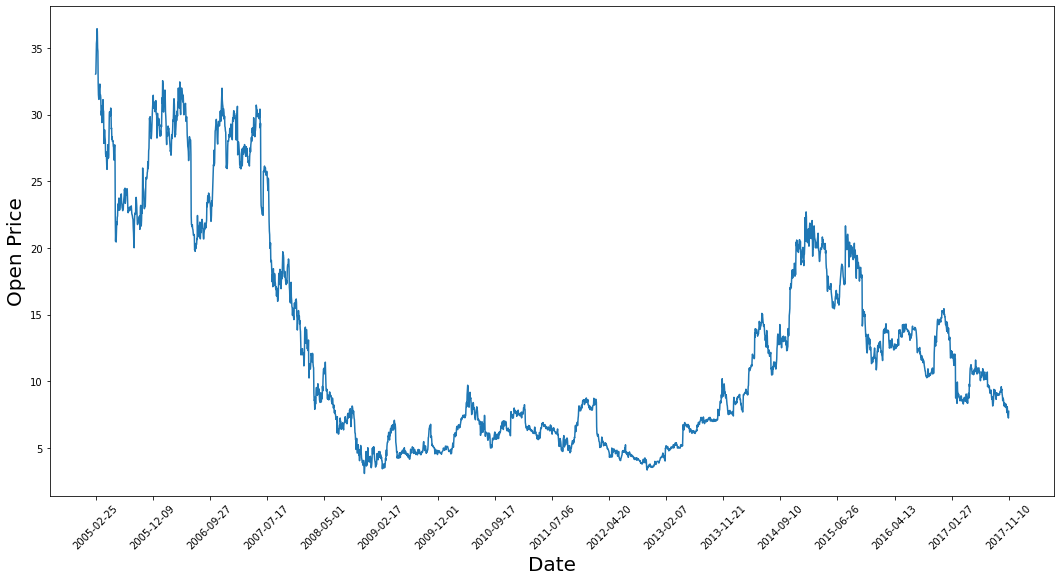

In [23]:
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]),df['Open'])
plt.xticks(range(0,df.shape[0],200),df['Date'].loc[::200],rotation = 45)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Open Price',fontsize=20)
plt.show()

In [27]:
D = df.iloc[:,1:2].values
D

array([[33.05],
       [33.1 ],
       [34.21],
       ...,
       [ 7.45],
       [ 7.25],
       [ 7.75]])

In [28]:
Tr_set = D[:2900]
Ts_set = D[2900:]

In [29]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [30]:
sc = MinMaxScaler(feature_range=(0,1))

In [33]:
Tr_scaled = sc.fit_transform(Tr_set)
Ts_scaled = sc.transform(Ts_set)

In [34]:
seq_len = 100
X_train = []
y_train = []
for i in range(seq_len,len(Tr_scaled)-seq_len):
  X_train.append(Tr_scaled[i-seq_len:i,0])
  y_train.append(Tr_scaled[i,0])

In [35]:
type(X_train)

list

In [38]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [39]:
X_train[0]

array([0.89808153, 0.89958034, 0.93285372, 0.96702638, 0.97452038,
       1.        , 0.9940048 , 0.95653477, 0.94904077, 0.87859712,
       0.85161871, 0.8426259 , 0.8411271 , 0.86510791, 0.87110312,
       0.87559952, 0.8501199 , 0.85161871, 0.8456235 , 0.81864508,
       0.80515588, 0.81564748, 0.78896882, 0.79466427, 0.82793765,
       0.82404077, 0.84052758, 0.81684652, 0.81414868, 0.74220624,
       0.75869305, 0.77218225, 0.77218225, 0.75539568, 0.74820144,
       0.71852518, 0.71342926, 0.72302158, 0.71372902, 0.69244604,
       0.683753  , 0.70383693, 0.70923261, 0.73920863, 0.73021583,
       0.70923261, 0.71672662, 0.757494  , 0.80665468, 0.8132494 ,
       0.80365707, 0.80545564, 0.80455635, 0.82164269, 0.81504796,
       0.7748801 , 0.77667866, 0.75119904, 0.75719424, 0.74670264,
       0.74820144, 0.74820144, 0.73621103, 0.73321343, 0.70473621,
       0.71372902, 0.73171463, 0.73890887, 0.71642686, 0.57583933,
       0.52188249, 0.54106715, 0.52038369, 0.54736211, 0.56534

In [40]:
y_train[0]

0.6235011990407674

In [41]:
X_test = []
y_test = []
for i in range(seq_len,len(Ts_scaled)-seq_len):
  X_test.append(Ts_scaled[i-seq_len:i,0])
  y_test.append(Ts_scaled[i,0])

In [42]:
X_test,y_test=np.array(X_test),np.array(y_test)

In [44]:
X_train.shape

(2700, 100)

In [45]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [46]:
X_train.shape

(2700, 100, 1)

In [47]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [48]:
X_test.shape

(101, 100, 1)

In [54]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [66]:
model.compile(optimizer='adam',loss=tf.losses.msle)

In [67]:
model.fit(X_train,y_train,epochs=5,batch_size=12)

Epoch 1/5
225/225 [==============================] - 21s 79ms/step - loss: 5.9052e-04
Epoch 2/5
225/225 [==============================] - 17s 77ms/step - loss: 5.6592e-04
Epoch 3/5
225/225 [==============================] - 18s 79ms/step - loss: 5.0748e-04
Epoch 4/5
225/225 [==============================] - 18s 80ms/step - loss: 4.7701e-04
Epoch 5/5
225/225 [==============================] - 19s 83ms/step - loss: 4.7586e-04


In [68]:
y_hat = model.predict(X_test)

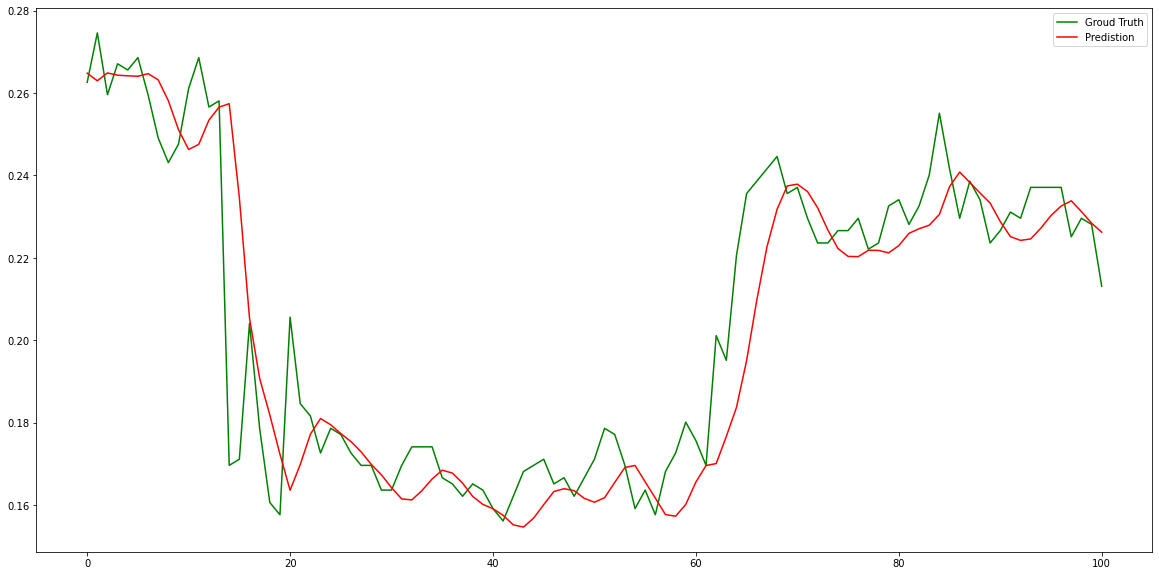

In [69]:
plt.figure(figsize=(20,10))
plt.plot(y_test,color='green',label='Groud Truth')
plt.plot(y_hat,color='red',label='Predistion')
plt.legend()
plt.show()